# Numerical Solution of the 1-D Time Dependent Schrödinger Equation for the Simple Harmonic Oscillator

## Preamble

In [18]:
import numpy as np
from scipy import sparse, integrate
import matplotlib.pyplot as plt

Space Grid

In [143]:
dx=0.01 # Spatial step in MeV^{-1}
x= np.arange(-5,5,dx) # Spatial grid

Parameters

In [145]:
k= 0.05 # Wave number
m= 0.511 # Mass in MeV
sigma= 0.5 # Width of the initial gaussian wavepacket
x0=-2.0 # Center of the initial gaussian wavepacket
A= 1.0/(sigma*np.sqrt(np.pi)) # Normalization constant of the initial gaussian wavepacket
T=1.0 # SHO period in MeV^{-1}
omega=2*np.pi/T # SHO angular frequency
hbar=1 # Natural units, adimensional. Otherwise use hbar= 1.0545718e-34 J s

## Potential $V(x)= \frac{1}{2}m\omega^2 x^2$

In [146]:
V=0.5*m*(omega**2)*x**2

## Initial Wavepacket

In [147]:
psi0=np.sqrt(A)*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*k*x)

Normalization check

In [148]:
np.sum(np.abs(psi0)**2)*dx

1.000000000000021

Text(0.5, 1.0, 'Potential and Initial Wavepacket')

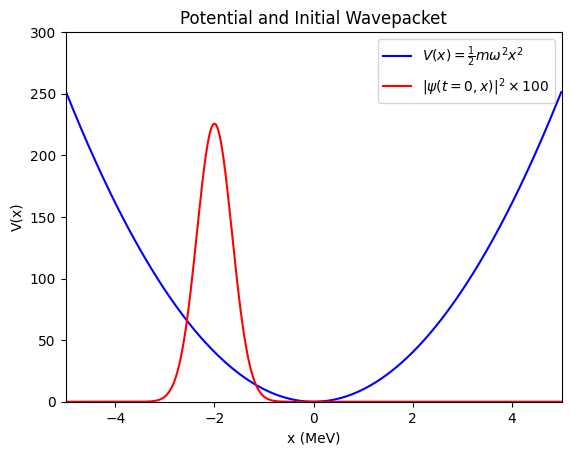

In [149]:
plt.plot(x,V,'b',label=r'$V(x)=\frac{1}{2}m\omega^2 x^2$')
plt.plot(x,200*np.abs(psi0)**2,'r',label=r'$|\psi(t=0,x)|^2\times 200$')
plt.legend(loc=1)
plt.xlabel('x (MeV)')
plt.ylabel('V(x)')
ax=plt.gca()
ax.set_ylim(0,300)
ax.set_xlim(-5,5)
plt.title(f'Potential and Initial Wavepacket')

## Laplace operator approximated by finite differences

$\frac{\partial^2 \psi(x_n)}{\partial x^2}\approx \frac{1}{(\Delta x)^2}\left[\psi(x_{n+1})-2\psi(x_{n})+\psi(x_{n-1})\right]$

$\frac{\partial^2 \psi(x)}{\partial x^2}\approx\frac{1}{(\Delta x)^2}\begin{pmatrix}
-2 &1 & 0&\cdots& 0\\
1 & -2 & 1&\cdots& 0\\
0 & 1 &-2&\cdots& 0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\cdots&-2
\end{pmatrix}\begin{pmatrix}\psi(x_0)\\\psi(x_1)\\\psi(x_2)\\\vdots\\\psi(x_N) \end{pmatrix}$

In [150]:
D2=sparse.diags([1,-2,1],[-1,0,1],shape=(x.size,x.size))/dx**2 # Laplace oparator in finite differences
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

# Time Dependent Schrödinger Equation

$\psi_t\equiv\frac{\partial \psi}{\partial t}=-\frac{i}{\hbar}\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)\right]$

In [151]:
def psi_t(t,psi):
  return -(1j/hbar)*(-(hbar**2/(2*m))*D2.dot(psi)+V*psi)

Time Grid

In [139]:
dt=0.005 # Time step (MeV^{-1})
t0=0.0 # Initial Time (MeV^{-1})
tmax=1.0 # Final Time (MeV^{-1})
time=np.arange(t0,tmax+dt,dt)

Solution to the Initial Value Problem

In [152]:
sol=integrate.solve_ivp(psi_t,t_span=[t0,tmax+dt],y0=psi0,t_eval=time,method="RK45")

Plot of all the Eigenfunctions at Different Times

Text(0.5, 1.0, 'Potential and Eigenfunctions at Different Times')

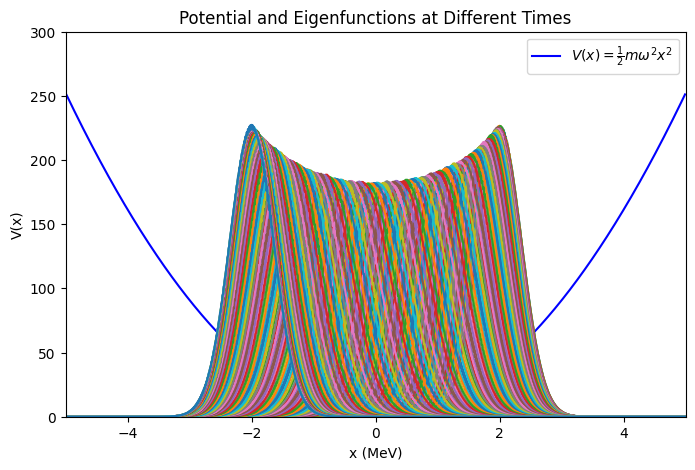

In [153]:
fig=plt.figure(figsize=(8,5))
plt.plot(x,V,'b',label=r'$V(x)=\frac{1}{2}m\omega^2 x^2$')
for i, t in enumerate(sol.t):
  plt.plot(x,200*np.abs(sol.y[:,i])**2)
plt.legend(loc=1)
plt.xlabel('x (MeV)')
plt.ylabel('V(x)')
ax=plt.gca()
ax.set_ylim(0,300)
ax.set_xlim(-5,5)
plt.title(f'Potential and Eigenfunctions at Different Times')

## Animation

In [130]:
import subprocess
from IPython.display import Image

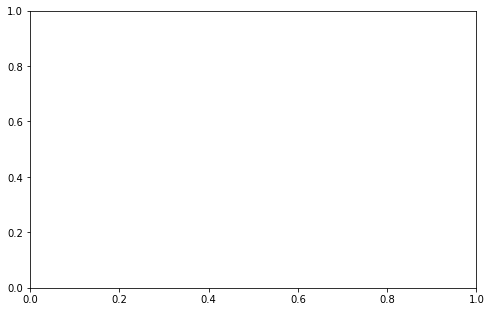

In [154]:
def make_plot(i):
  #Plot an save an image of the oscillator squared wavefunction for each time index i
  plt.plot(x,V,'b',label=r'$V(x)=\frac{1}{2}m\omega^2 x^2$')
  plt.plot(x,200*np.abs(sol.y[:,i])**2,'r')
  plt.legend(loc=1)
  plt.xlabel('x (MeV)')
  plt.ylabel(r'$V(x)$, $|\psi(t,x)|^2\times 200$')
  ax1=plt.gca()
  ax1.set_ylim(0,300)
  ax1.set_xlim(-5,5)
  plt.title(f'Time Evolution of the Initial Wavepacket')
  plt.savefig('_img{:04d}.png'.format(i//di), dpi=72)
  plt.cla()

# Definition of the time step in the animation
fps=100 # Frames per time unit
di=int(1//(fps*dt))
fig=plt.figure(figsize=(8,5),dpi=72)
ax=fig.add_subplot(111)

for i in range(0,time.size,di):
  make_plot(i)


In [155]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [156]:
i="*.png"
o= "sho.gif"
subprocess.call("convert -delay 10 -loop 0 " + i + " " + o,shell=True)

0

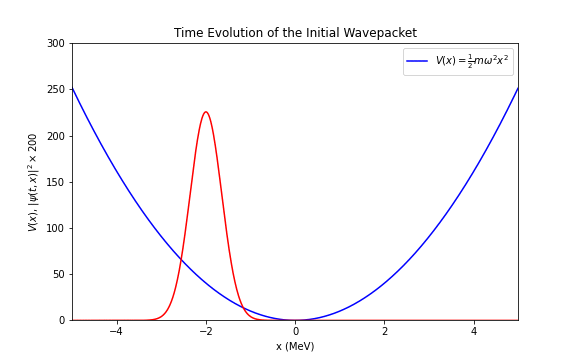

In [157]:
fname='sho.gif'
Image(open(fname,'rb').read())